In [1459]:
#installs
#!pip install xlrd
#!pip install uncertainties

In [1460]:
#imports
import pandas as pd
import numpy as np
from uncertainties import unumpy as unp
from uncertainties import ufloat
from uncertainties.umath import *
import math
import scipy as sc
import matplotlib.pyplot as plt
from scipy import optimize
from numpy import arange
from numpy.ma.core import tan
from scipy.optimize import curve_fit
import csv
from scipy.signal import find_peaks

In [1461]:
#methods
def daten_fitten(funct, x_data, y_data, genauigkeit, p, min, max): #Step4/5
    #fiten
    pars, cov = curve_fit(f=funct, xdata=x_data, ydata=y_data, p0=p, bounds=[-np.inf, np.inf], maxfev=500000)
    # Get the standard deviations of the parameters (square roots of the diagonal of the covariance)
    stdevs = np.sqrt(np.diag(cov))
    print('Fitparameter')
    print(pars)
    print('zugehörige Uncertainty')
    print(stdevs)
    #datensets
    xfit = np.linspace(min, max, genauigkeit)
    yfit = funct(xfit, *pars)
    return pars, stdevs, xfit, yfit

def find_x_intercepts(func, a, b):
  x_intercepts = []
  x_values = np.arange(10, 15, 0.001)
  for x in x_values:
    y = func(x, a, b)
    if abs(y) < 0.001:
      x_intercepts.append(x)
  return x_intercepts

def gaussian(x, a, b, c, d):
    return a*np.exp(-(x - b)**2 / (2 * c**2)) + d

Definitionswerte

In [1462]:
backgroundPowermeter = ufloat(0.0003678, 0.04227)

Daten einlesen etc

In [1463]:
#Daten einlesen Aufgabe 1
dataA1_T20 = pd.read_excel('A1_T20.xlsx')
dataA1_T25 = pd.read_excel('A1_T25.xlsx')
dataA1_T30 = pd.read_excel('A1_T30.xlsx')

#converte dataframe to array
dataA1_T20 = dataA1_T20.values
dataA1_T25 = dataA1_T25.values
dataA1_T30 = dataA1_T30.values

#data to uarray with uncertainties
dataA1_T20[:, 2] = dataA1_T20[:, 2]/1000
udataA1_T20 = unp.uarray(dataA1_T20[:,1], dataA1_T20[:,2])
udataA1_T20 = np.column_stack((udataA1_T20, dataA1_T20[:,0]))
udataA1_T20[:, 0] -= backgroundPowermeter

uncertainty_array= np.full(len(udataA1_T20), 0.1)
A1_T20_I = unp.uarray(udataA1_T20[:, 1], uncertainty_array)
udataA1_T20 = np.column_stack((udataA1_T20, A1_T20_I))
udataA1_T20 = np.delete(udataA1_T20, 1, axis=1)


dataA1_T25[:, 2] = dataA1_T25[:, 2]/1000
udataA1_T25 = unp.uarray(dataA1_T25[:,1], dataA1_T25[:,2])
udataA1_T25 = np.column_stack((udataA1_T25, dataA1_T25[:,0]))
udataA1_T25[:, 0] -= backgroundPowermeter

uncertainty_array= np.full(len(udataA1_T25), 0.1)
A1_T25_I = unp.uarray(udataA1_T25[:, 1], uncertainty_array)
udataA1_T25 = np.column_stack((udataA1_T25, A1_T25_I))
udataA1_T25 = np.delete(udataA1_T25, 1, axis=1)


dataA1_T30[:, 2] = dataA1_T30[:, 2]/1000
udataA1_T30 = unp.uarray(dataA1_T30[:,1], dataA1_T30[:,2])
udataA1_T30 = np.column_stack((udataA1_T30, dataA1_T30[:,0]))
udataA1_T30[:, 0] -= backgroundPowermeter

uncertainty_array= np.full(len(udataA1_T30), 0.1)
A1_T30_I = unp.uarray(udataA1_T30[:, 1], uncertainty_array)
udataA1_T30 = np.column_stack((udataA1_T30, A1_T30_I))
udataA1_T30 = np.delete(udataA1_T30, 1, axis=1)

#Daten einlesen Aufgabe 2
data_array_T20 = []

for i in range(25):
    filename = f"TRC20-{i:02d}.CSV"
    df = pd.read_csv(filename)
    data_array_T20.append(df.values)

data_array_T20 = np.array(data_array_T20)


# Überprüfe die Dimensionen des Arrays
print("Dimensionen des Arrays:", data_array_T20.shape)

data_array_T25 = []

for i in range(25):
    filename = f"TRC25-{i:02d}.CSV"
    df = pd.read_csv(filename)
    data_array_T25.append(df.values)

data_array_T25 = np.array(data_array_T25)


# Überprüfe die Dimensionen des Arrays
print("Dimensionen des Arrays:", data_array_T25.shape)

data_array_T30 = []

for i in range(26):
    filename = f"TRC30-{i:02d}.CSV"
    df = pd.read_csv(filename)
    data_array_T30.append(df.values)

data_array_T30 = np.array(data_array_T30)


# Überprüfe die Dimensionen des Arrays
print("Dimensionen des Arrays:", data_array_T30.shape)

data_array_A36 = []

for i in range(21):
    filename = f"TRC36-{i:02d}.CSV"
    df = pd.read_csv(filename)
    data_array_A36.append(df.values)

data_array_A36 = np.array(data_array_A36)


# Überprüfe die Dimensionen des Arrays
print("Dimensionen des Arrays:", data_array_A36.shape)



#Variationsdaten Aufgabe 2

dataA2_T20 = pd.read_excel('A2_T20.xlsx')
dataA2_T25 = pd.read_excel('A2_T25.xlsx')
dataA2_T30 = pd.read_excel('A2_T30.xlsx')
dataA2_A36 = pd.read_excel('A2_A36.xlsx')


dataA2_T20 = dataA2_T20.values
dataA2_T25 = dataA2_T25.values
dataA2_T30 = dataA2_T30.values
dataA2_A36 = dataA2_A36.values

Dimensionen des Arrays: (25, 6000, 2)
Dimensionen des Arrays: (25, 6000, 2)
Dimensionen des Arrays: (26, 6000, 2)
Dimensionen des Arrays: (21, 6000, 2)


Aufgabe 1

Fitparameter
[  1.0775132  -15.04194091]
zugehörige Uncertainty
[0.00134452 0.03284387]
Fitparameter
[ 0.00322237 -0.00622552]
zugehörige Uncertainty
[0.00046276 0.00377197]


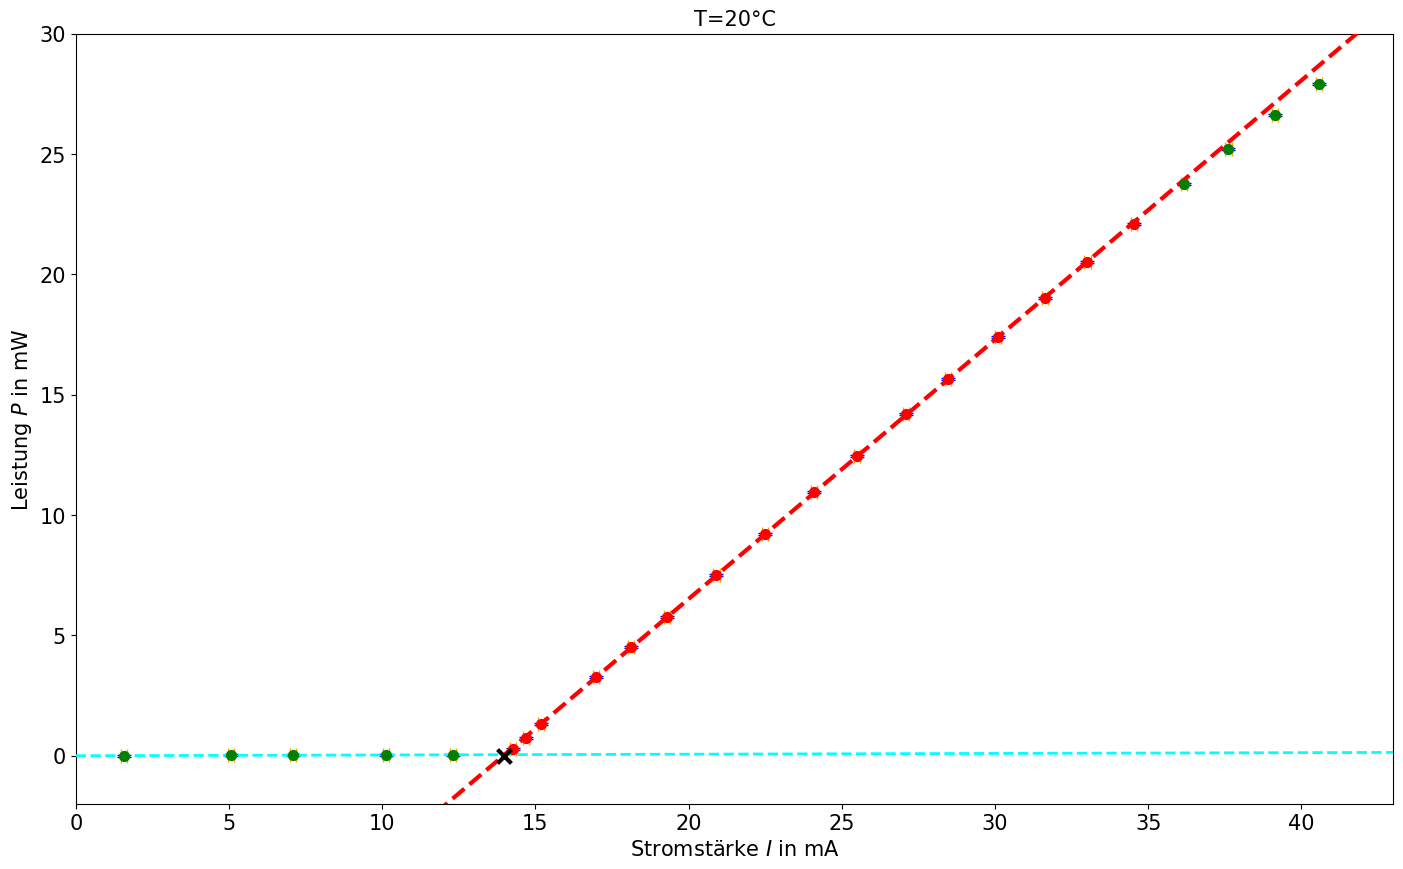

Fitparameter
[  1.07059297 -15.33127052]
zugehörige Uncertainty
[0.00166796 0.04094715]
Fitparameter
[ 0.00424077 -0.01551133]
zugehörige Uncertainty
[0.00056749 0.00586853]


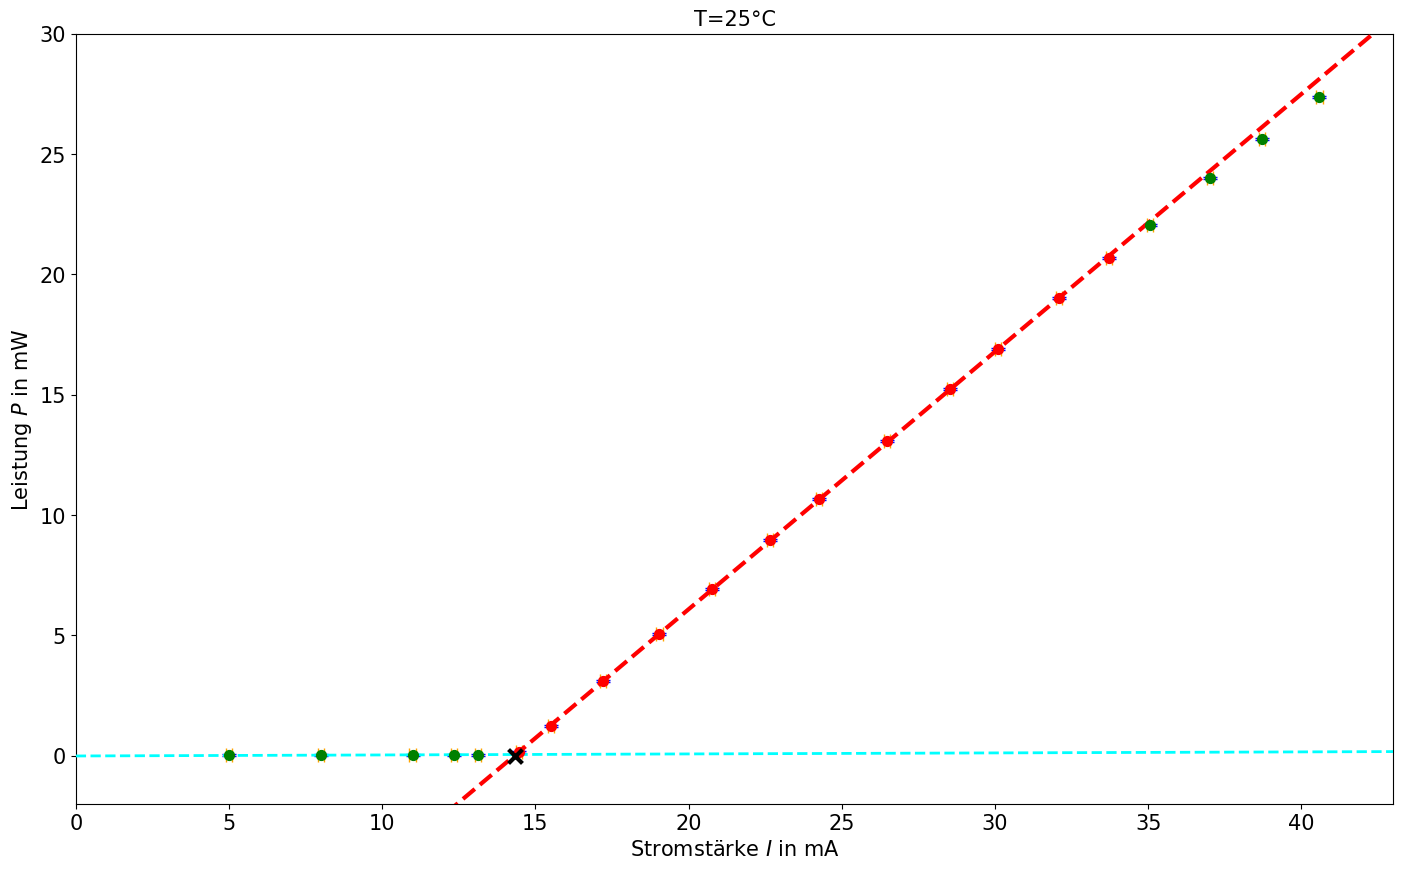

Fitparameter
[  1.06199344 -15.62479139]
zugehörige Uncertainty
[0.00260409 0.06215561]
Fitparameter
[ 0.00375074 -0.01240296]
zugehörige Uncertainty
[0.00057579 0.00575945]


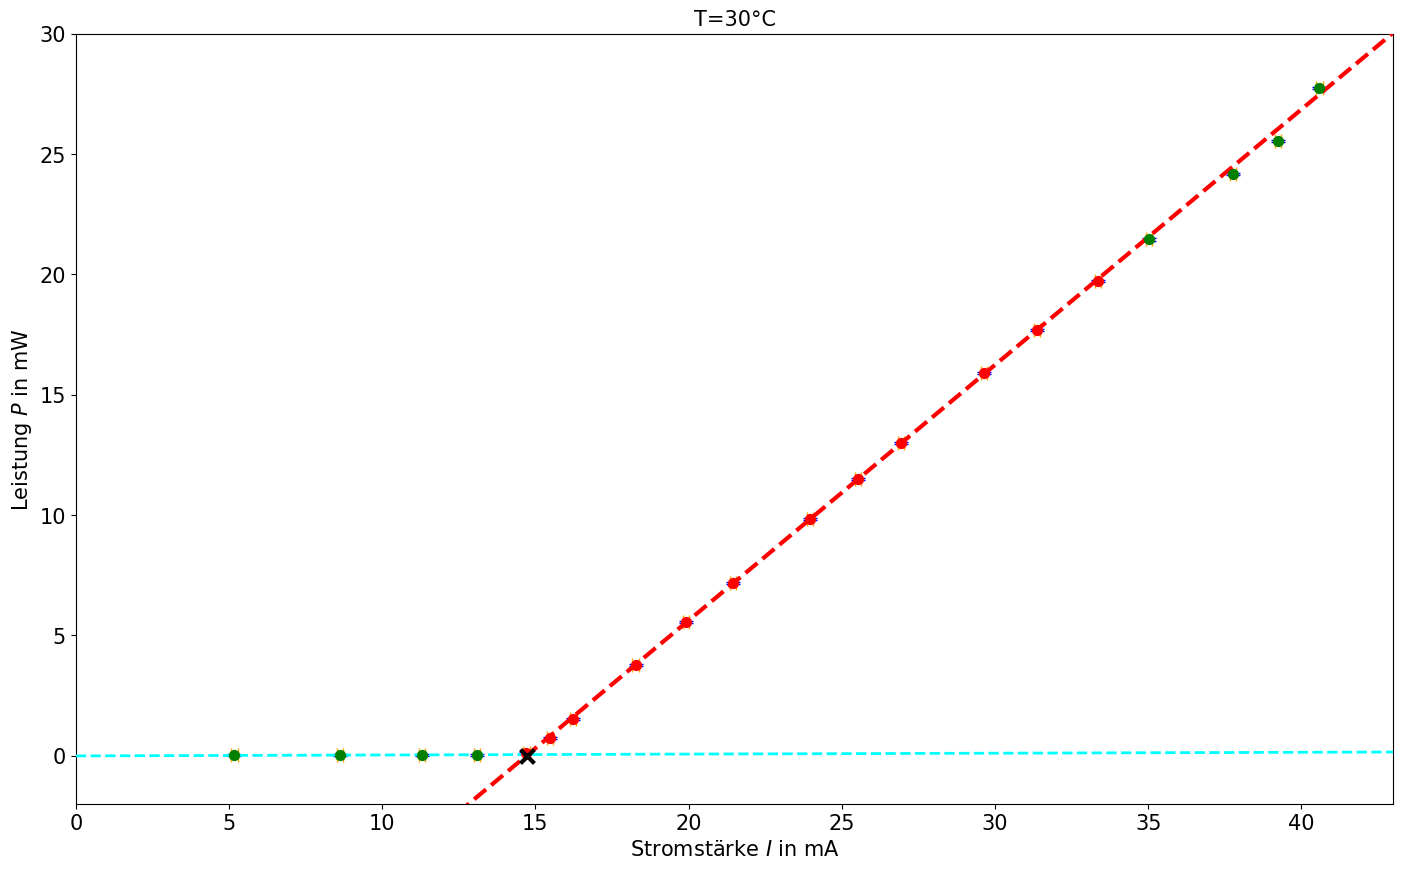

Fitparameter
[  1.0775132  -15.04194091]
zugehörige Uncertainty
[0.00134452 0.03284387]
Fitparameter
[  1.07059297 -15.33127052]
zugehörige Uncertainty
[0.00166796 0.04094715]
Fitparameter
[  1.06199344 -15.62479139]
zugehörige Uncertainty
[0.00260409 0.06215561]


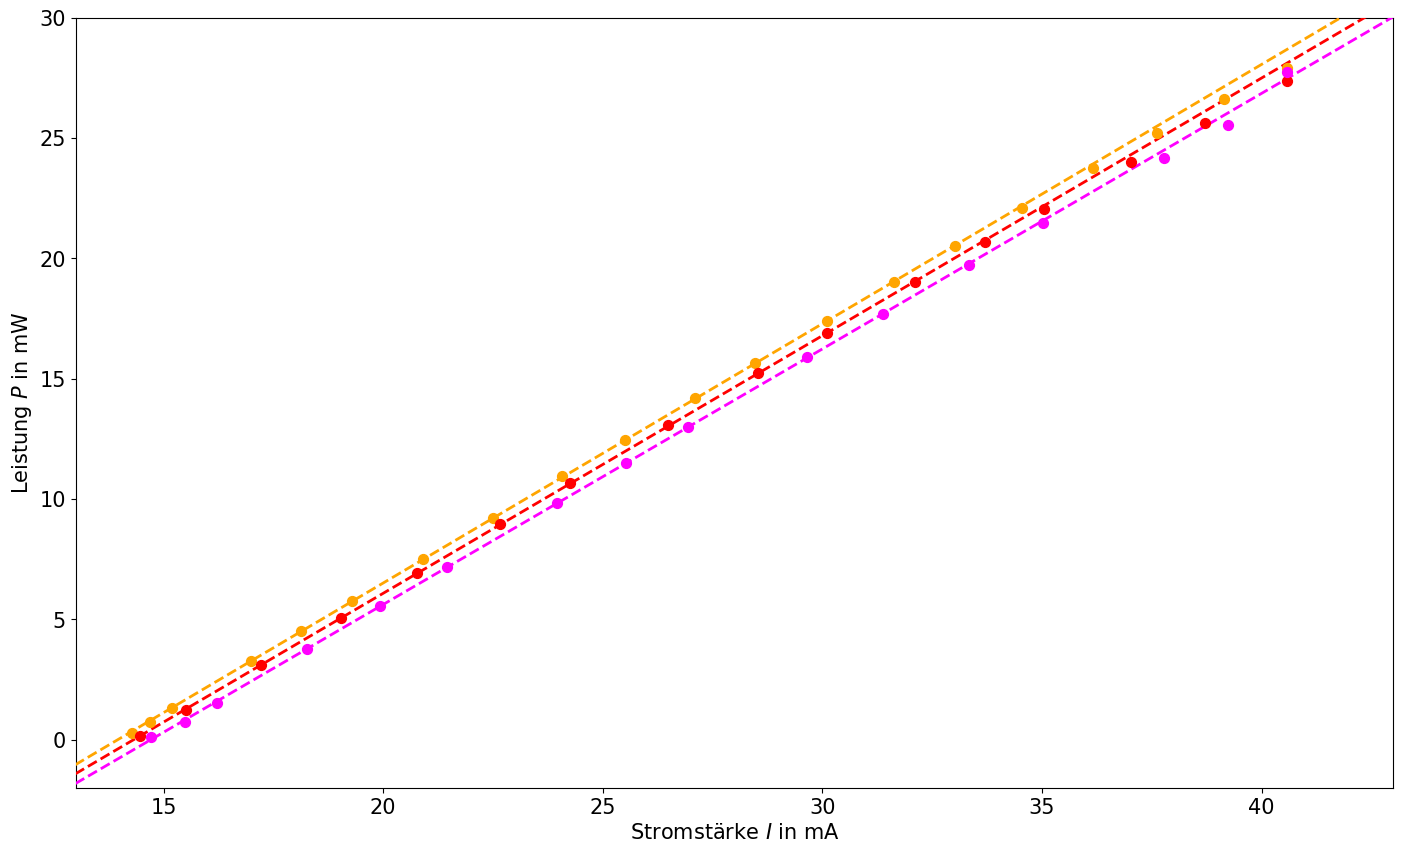

In [1485]:
def line(x, a, b):
  return a*x + b

def uline(x, a, b, af, bf):
  a = ufloat(a, af)
  b = ufloat(b, bf)
  return a*x + b

condition_nolasering = udataA1_T20[:, 1] < 14
condition_lasering = np.logical_and(udataA1_T20[:, 1] >= 14, udataA1_T20[:, 1] <= 35)
condition_third = udataA1_T20[:, 1] > 35

udataA1_T20_nolasering = udataA1_T20[condition_nolasering]
udataA1_T20_lasering = udataA1_T20[condition_lasering]
udataA1_T20_third = udataA1_T20[condition_third]

plt.subplots(1,1,figsize=(17, 10));

y = [float(i[0].nominal_value) for i in udataA1_T20_lasering]
x = [float(i[1].nominal_value) for i in udataA1_T20_lasering]

plt.scatter(x, y, color='red', s=50, zorder= 5)

y_error = [float(i[0].std_dev) for i in udataA1_T20_lasering]
x_error = [float(i[1].std_dev) for i in udataA1_T20_lasering]

plt.errorbar(x, y, yerr=y_error, fmt='o', capsize=5, color='blue')
plt.errorbar(x, y, xerr=x_error, fmt='o', capsize=5, color='orange')

y1 = [float(i[0].nominal_value) for i in udataA1_T20_nolasering]
x1 = [float(i[1].nominal_value) for i in udataA1_T20_nolasering]

plt.scatter(x1, y1, color='green', s=50, zorder= 5)

y1_error = [float(i[0].std_dev) for i in udataA1_T20_nolasering]
x1_error = [float(i[1].std_dev) for i in udataA1_T20_nolasering]

plt.errorbar(x1, y1, yerr=y1_error, fmt='o', capsize=5, color='blue')
plt.errorbar(x1, y1, xerr=x1_error, fmt='o', capsize=5, color='orange')

y2 = [float(i[0].nominal_value) for i in udataA1_T20_third]
x2 = [float(i[1].nominal_value) for i in udataA1_T20_third]

plt.scatter(x2, y2, color='green', s=50, zorder= 5)

y2_error = [float(i[0].std_dev) for i in udataA1_T20_third]
x2_error = [float(i[1].std_dev) for i in udataA1_T20_third]

plt.errorbar(x2, y2, yerr=y2_error, fmt='o', capsize=5, color='blue')
plt.errorbar(x2, y2, xerr=x2_error, fmt='o', capsize=5, color='orange')


pars, stdevs, xfit, yfit = daten_fitten(line, x, y, 100, [1, 1], 0 ,45)
plt.plot(xfit, yfit, '--', color='red', label = r'Linear-Fit: $ y = (%.3f \pm %.3f) \frac{mW}{mA} \cdot x + (%.1f \pm %.1f) mW$'%(pars[0], stdevs[0], pars[1], stdevs[1]), zorder= 4, linewidth=3)

x_intercept = -pars[1] / pars[0]
x_intercept_uncertainty = np.sqrt((stdevs[1] / pars[0])**2 + (pars[1] * stdevs[0] / pars[0]**2)**2)

plt.scatter(x_intercept, 0, color='black', marker='x', linewidths=3, s=100, label = r'Schnittpunkt 25°C: $((%.3f \pm %.3f)mA | 0mW)$'%(x_intercept, x_intercept_uncertainty), zorder= 7)

pars, stdevs, xfit, yfit = daten_fitten(line, x1, y1, 100, [1, 1], 0 ,45)
plt.plot(xfit, yfit, '--', color='cyan', label = r'vor Lasern', zorder= 4, linewidth=2)

plt.xlabel(r'Stromstärke $I$ in mA', fontsize=15)
plt.ylabel(r'Leistung $P$ in mW', fontsize=15)
plt.title('T=20°C', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Display the plot
plt.axis([0, 43, -2, 30]) #Achsenanpassung
plt.show()



condition_nolasering = udataA1_T25[:, 1] < 14
condition_lasering = np.logical_and(udataA1_T25[:, 1] >= 14, udataA1_T25[:, 1] <= 35)
condition_third = udataA1_T25[:, 1] > 35

udataA1_T25_nolasering = udataA1_T25[condition_nolasering]
udataA1_T25_lasering = udataA1_T25[condition_lasering]
udataA1_T25_third = udataA1_T25[condition_third]

plt.subplots(1,1,figsize=(17, 10));

y = [float(i[0].nominal_value) for i in udataA1_T25_lasering]
x = [float(i[1].nominal_value) for i in udataA1_T25_lasering]

plt.scatter(x, y, color='red', s=50, label='Fit-Data', zorder= 5)

y_error = [float(i[0].std_dev) for i in udataA1_T25_lasering]
x_error = [float(i[1].std_dev) for i in udataA1_T25_lasering]

plt.errorbar(x, y, yerr=y_error, fmt='o', capsize=5, color='blue')
plt.errorbar(x, y, xerr=x_error, fmt='o', capsize=5, color='orange')

y1 = [float(i[0].nominal_value) for i in udataA1_T25_nolasering]
x1 = [float(i[1].nominal_value) for i in udataA1_T25_nolasering]

plt.scatter(x1, y1, color='green',label='Data', s=50, zorder= 5)

y1_error = [float(i[0].std_dev) for i in udataA1_T25_nolasering]
x1_error = [float(i[1].std_dev) for i in udataA1_T25_nolasering]

plt.errorbar(x1, y1, yerr=y1_error, fmt='o', capsize=5, color='blue')
plt.errorbar(x1, y1, xerr=x1_error, fmt='o', capsize=5, color='orange')

y2 = [float(i[0].nominal_value) for i in udataA1_T25_third]
x2 = [float(i[1].nominal_value) for i in udataA1_T25_third]

plt.scatter(x2, y2, color='green', s=50, zorder= 5)

y2_error = [float(i[0].std_dev) for i in udataA1_T25_third]
x2_error = [float(i[1].std_dev) for i in udataA1_T25_third]

plt.errorbar(x2, y2, yerr=y2_error, fmt='o', capsize=5, color='blue')
plt.errorbar(x2, y2, xerr=x2_error, fmt='o', capsize=5, color='orange')


pars, stdevs, xfit, yfit = daten_fitten(line, x, y, 100, [1, 1], 0 ,45)
plt.plot(xfit, yfit, '--', color='red', label = r'Linear-Fit: $ y = (%.3f \pm %.3f) \frac{mW}{mA} \cdot x + (%.1f \pm %.1f) mW$'%(pars[0], stdevs[0], pars[1], stdevs[1]), zorder= 4, linewidth=3)

x_intercept = -pars[1] / pars[0]
x_intercept_uncertainty = np.sqrt((stdevs[1] / pars[0])**2 + (pars[1] * stdevs[0] / pars[0]**2)**2)

plt.scatter(x_intercept, 0, color='black', marker='x', linewidths=3, s=100, label = r'Schnittpunkt 25°C: $((%.3f \pm %.3f)mA | 0mW)$'%(x_intercept, x_intercept_uncertainty), zorder= 7)

pars, stdevs, xfit, yfit = daten_fitten(line, x1, y1, 100, [1, 1], 0 ,45)
plt.plot(xfit, yfit, '--', color='cyan', label = r'Linear-Fit: $ y = (%.4f \pm %.4f) \frac{mW}{mA} \cdot x + (%.3f \pm %.3f) mW$'%(pars[0], stdevs[0], pars[1], stdevs[1]), zorder= 4, linewidth=2)

plt.xlabel(r'Stromstärke $I$ in mA', fontsize=15)
plt.ylabel(r'Leistung $P$ in mW', fontsize=15)
plt.title('T=25°C', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Display the plot
plt.axis([0, 43, -2, 30]) #Achsenanpassung
plt.show()



condition_nolasering = udataA1_T30[:, 1] < 14
condition_lasering = np.logical_and(udataA1_T30[:, 1] >= 14, udataA1_T30[:, 1] <= 35)
condition_third = udataA1_T30[:, 1] > 35

udataA1_T30_nolasering = udataA1_T30[condition_nolasering]
udataA1_T30_lasering = udataA1_T30[condition_lasering]
udataA1_T30_third = udataA1_T30[condition_third]

plt.subplots(1,1,figsize=(17, 10));

y = [float(i[0].nominal_value) for i in udataA1_T30_lasering]
x = [float(i[1].nominal_value) for i in udataA1_T30_lasering]

plt.scatter(x, y, color='red', s=50, label='Fit-Data', zorder= 5)

y_error = [float(i[0].std_dev) for i in udataA1_T30_lasering]
x_error = [float(i[1].std_dev) for i in udataA1_T30_lasering]

plt.errorbar(x, y, yerr=y_error, fmt='o', capsize=5, label = r'$δP$', color='blue')
plt.errorbar(x, y, xerr=x_error, fmt='o', capsize=5, label = r'$δI$', color='orange')

y1 = [float(i[0].nominal_value) for i in udataA1_T30_nolasering]
x1 = [float(i[1].nominal_value) for i in udataA1_T30_nolasering]

plt.scatter(x1, y1, color='green',label='Data', s=50, zorder= 5)

y1_error = [float(i[0].std_dev) for i in udataA1_T30_nolasering]
x1_error = [float(i[1].std_dev) for i in udataA1_T30_nolasering]

plt.errorbar(x1, y1, yerr=y1_error, fmt='o', capsize=5, color='blue')
plt.errorbar(x1, y1, xerr=x1_error, fmt='o', capsize=5, color='orange')

y2 = [float(i[0].nominal_value) for i in udataA1_T30_third]
x2 = [float(i[1].nominal_value) for i in udataA1_T30_third]

plt.scatter(x2, y2, color='green', s=50, zorder= 5)

y2_error = [float(i[0].std_dev) for i in udataA1_T30_third]
x2_error = [float(i[1].std_dev) for i in udataA1_T30_third]

plt.errorbar(x2, y2, yerr=y2_error, fmt='o', capsize=5, color='blue')
plt.errorbar(x2, y2, xerr=x2_error, fmt='o', capsize=5, color='orange')


pars, stdevs, xfit, yfit = daten_fitten(line, x, y, 100, [1, 1], 0 ,45)
plt.plot(xfit, yfit, '--', color='red', label = r'Linear-Fit: $ y = (%.3f \pm %.3f) \frac{mW}{mA} \cdot x + (%.1f \pm %.1f) mW$'%(pars[0], stdevs[0], pars[1], stdevs[1]), zorder= 4, linewidth=3)

x_intercept = -pars[1] / pars[0]
x_intercept_uncertainty = np.sqrt((stdevs[1] / pars[0])**2 + (pars[1] * stdevs[0] / pars[0]**2)**2)

plt.scatter(x_intercept, 0, color='black', marker='x', linewidths=3, s=100, label = r'Schnittpunkt 25°C: $((%.3f \pm %.3f)mA | 0mW)$'%(x_intercept, x_intercept_uncertainty), zorder= 7)

pars, stdevs, xfit, yfit = daten_fitten(line, x1, y1, 100, [1, 1], 0 ,45)
plt.plot(xfit, yfit, '--', color='cyan', label = r'Linear-Fit: $ y = (%.4f \pm %.4f) \frac{mW}{mA} \cdot x + (%.3f \pm %.3f) mW$'%(pars[0], stdevs[0], pars[1], stdevs[1]), zorder= 4, linewidth=2)

plt.xlabel(r'Stromstärke $I$ in mA', fontsize=15)
plt.ylabel(r'Leistung $P$ in mW', fontsize=15)
plt.title('T=30°C', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Display the plot
plt.axis([0, 43, -2, 30]) #Achsenanpassung
plt.show()

plt.subplots(1,1,figsize=(17, 10));

y_t20 = [float(i[0].nominal_value) for i in udataA1_T20_lasering]
x_t20 = [float(i[1].nominal_value) for i in udataA1_T20_lasering]

plt.scatter(x_t20, y_t20, color='orange', s=50, label='20°C', zorder= 5)


y_t25 = [float(i[0].nominal_value) for i in udataA1_T25_lasering]
x_t25 = [float(i[1].nominal_value) for i in udataA1_T25_lasering]

plt.scatter(x_t25, y_t25, color='red', s=50, label='25°C', zorder= 5)


y_t30 = [float(i[0].nominal_value) for i in udataA1_T30_lasering]
x_t30 = [float(i[1].nominal_value) for i in udataA1_T30_lasering]

plt.scatter(x_t30, y_t30, color='magenta', s=50, label='30°C', zorder= 5)

y_t20_third = [float(i[0].nominal_value) for i in udataA1_T20_third]
x_t20_third = [float(i[1].nominal_value) for i in udataA1_T20_third]

plt.scatter(x_t20_third, y_t20_third, color='orange', s=50, zorder= 5)


y_t25_third = [float(i[0].nominal_value) for i in udataA1_T25_third]
x_t25_third = [float(i[1].nominal_value) for i in udataA1_T25_third]

plt.scatter(x_t25_third, y_t25_third, color='red', s=50, zorder= 5)


y_t30_third = [float(i[0].nominal_value) for i in udataA1_T30_third]
x_t30_third = [float(i[1].nominal_value) for i in udataA1_T30_third]

plt.scatter(x_t30_third, y_t30_third, color='magenta', s=50, zorder= 5)



pars, stdevs, xfit, yfit = daten_fitten(line, x_t20, y_t20, 100, [1, 1], 0 ,45)
plt.plot(xfit, yfit, '--', color='orange', label = r'Linear-Fit: $ y = (%.3f \pm %.3f) \frac{mW}{mA} \cdot x + (%.1f \pm %.1f) mW$'%(pars[0], stdevs[0], pars[1], stdevs[1]), zorder= 4, linewidth=2)

effizienz20 = ufloat(pars[0], stdevs[0])


pars, stdevs, xfit, yfit = daten_fitten(line, x_t25, y_t25, 100, [1, 1], 0 ,45)
plt.plot(xfit, yfit, '--', color='red', label = r'Linear-Fit: $ y = (%.3f \pm %.3f) \frac{mW}{mA} \cdot x + (%.1f \pm %.1f) mW$'%(pars[0], stdevs[0], pars[1], stdevs[1]), zorder= 4, linewidth=2)

effizienz25 = ufloat(pars[0], stdevs[0])

pars, stdevs, xfit, yfit = daten_fitten(line, x_t30, y_t30, 100, [1, 1], 0 ,45)
plt.plot(xfit, yfit, '--', color='magenta', label = r'Linear-Fit: $ y = (%.3f \pm %.3f) \frac{mW}{mA} \cdot x + (%.1f \pm %.1f) mW$'%(pars[0], stdevs[0], pars[1], stdevs[1]), zorder= 4, linewidth=2)

effizienz30 = ufloat(pars[0], stdevs[0])


plt.xlabel(r'Stromstärke $I$ in mA', fontsize=15)
plt.ylabel(r'Leistung $P$ in mW', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Display the plot
plt.axis([13, 43, -2, 30]) #Achsenanpassung
plt.show()

In [1465]:
print('Effizienz 20°C = ', effizienz20 )
print('Effizienz 25°C = ', effizienz25 )
print('Effizienz 30°C = ', effizienz30 )

e = 1.6702e-19 #C
h = 6.626e-34 #Js
c = 3e8 #m/s
wellenlänge = 670e-9

Quantiumeffizienz20 = effizienz20*wellenlänge*e/(h*c)
Quantiumeffizienz25 = effizienz25*wellenlänge*e/(h*c)
Quantiumeffizienz30 = effizienz30*wellenlänge*e/(h*c)

print('Quantumeffizienz 20°C = ', Quantiumeffizienz20 )
print('Quantumeffizienz 25°C = ', Quantiumeffizienz25 )
print('Quantumeffizienz 30°C = ', Quantiumeffizienz30 )

Effizienz 20°C =  1.0775+/-0.0013
Effizienz 25°C =  1.0706+/-0.0017
Effizienz 30°C =  1.0620+/-0.0026
Quantumeffizienz 20°C =  0.6066+/-0.0008
Quantumeffizienz 25°C =  0.6027+/-0.0009
Quantumeffizienz 30°C =  0.5979+/-0.0015


Aufgabe 2

In [1466]:
peaks_results_T20 = []
for i in range(data_array_T20.shape[0]):
    x = data_array_T20[i, :, 0]
    y = data_array_T20[i, :, 1]

    peaks, _ = find_peaks(y, height=0.01, distance=100)
    peaks_results_T20.append((i, peaks))



In [1467]:
def calculate_peak_distances(peaks_array, x):
    distances = []

    # Iteriere über jedes Element im peaks_array
    for plot_index, plot_peaks in peaks_array:
        # Überprüfe, ob die Anzahl der Peaks gerade ist
        if len(plot_peaks) % 2 == 0:
            # Berechne die Hälfte der Anzahl der Peaks
            half_length = len(plot_peaks) // 2

            # Iteriere über die Hälfte der Peaks und berechne die Abstände
            for j in range(half_length):
                # Index des entsprechenden Peaks im zweiten Teil des Arrays
                corresponding_index = j + half_length

                # Berechne den Abstand und füge ihn zum Abstands-Array hinzu
                #distance = x[plot_peaks[corresponding_index]] - x[plot_peaks[j]]
                distance = x[plot_index, plot_peaks[corresponding_index], 0] - x[plot_index, plot_peaks[j], 0]
                if abs(distance) > 0.005 and abs(distance) < 0.013: # Filtere Abstände, die nicht ins Kriterium passen
                    distances.append(distance)

    return np.array(distances)

def calculate_mode_distances(peaks_array, x):
    distances = []

    # Iteriere über jedes Element im peaks_array
    for plot_index, plot_peaks in peaks_array:
        # Überprüfe, ob die Anzahl der Peaks gerade ist
        if len(plot_peaks) >= 1:
            for j in range(len(plot_peaks)-1):
                distance = x[plot_index, plot_peaks[j+1], 0] - x[plot_index, plot_peaks[j], 0]
                if abs(distance) < 0.0015: # Filtere Abstände, die nicht ins Kriterium passen
                  distances.append(distance)

    return np.array(distances)

distances = calculate_peak_distances(peaks_results_T20, data_array_T20)
mean_distance = np.mean(distances)
std_dev_distance = np.std(distances)
number = len(distances)
print("Mittlerer Abstand zwischen den Peaks:", mean_distance)
print("Standardabweichung der Abstände zwischen den Peaks:", std_dev_distance)
print(number, "Peak-Paare wurden analysiert")

distance = ufloat(mean_distance, std_dev_distance)
print(distance)

kalibration = 630/distance
print(kalibration)

mode_distances = calculate_mode_distances(peaks_results_T20, data_array_T20)
mode_distances20 = mode_distances* kalibration

mean_distance = np.mean(mode_distances)
std_dev_distance = np.std(mode_distances)
number = len(mode_distances)
print("Mittlerer Abstand zwischen den Moden:", mean_distance)
print("Standardabweichung der Abstände zwischen den Moden:", std_dev_distance)
print("Max Moden Abstand:", max(mode_distances))
print("Min Moden Abstand:", min(mode_distances))
print("Standardabweichung der Abstände zwischen den Moden:", std_dev_distance)
print(number, "Moden-Paare wurden analysiert")

mode_distances = ufloat(mean_distance, std_dev_distance)
print(mode_distances)
mode_distances = mode_distances* kalibration
print(mode_distances)

Mittlerer Abstand zwischen den Peaks: 0.010186875
Standardabweichung der Abstände zwischen den Peaks: 0.0005109718528206813
32 Peak-Paare wurden analysiert
0.0102+/-0.0005
(6.18+/-0.31)e+04
Mittlerer Abstand zwischen den Moden: 0.0009344999999999999
Standardabweichung der Abstände zwischen den Moden: 5.8864958450111334e-05
Max Moden Abstand: 0.001063999999999999
Min Moden Abstand: 0.000804
Standardabweichung der Abstände zwischen den Moden: 5.8864958450111334e-05
48 Moden-Paare wurden analysiert
0.00093+/-0.00006
58+/-5


In [1468]:
peaks_results_T20 = []
breite = []
for i in range(data_array_T20.shape[0]):
    x = data_array_T20[i, :, 0] * kalibration.nominal_value
    y = data_array_T20[i, :, 1]

    peaks, _ = find_peaks(y, height=0.01, distance=100)
    peaks_results_T20.append((i, peaks))

    plt.subplots(1,1,figsize=(17, 10));

    plt.plot(x, y, marker='o', markersize=2, linestyle='-', color='blue')
    for j in range(len(peaks)):
      plt.scatter(x[peaks[j]], y[peaks[j]], color='black', marker='x', s=100, label = r'Peak: $((%.3f|%.3f )$'%(x[peaks[j]], y[peaks[j]]), zorder= 7)
      pars, stdevs, xfit, yfit = daten_fitten(gaussian, x, y, 100000, [y[peaks[j]], x[peaks[j]], 1, -0.01], x[peaks[j]]-40 ,x[peaks[j]]+40)
      plt.plot(xfit, yfit, '--', color='red', zorder= 4, linewidth=2)
      breite.append((pars[2]))

    # Füge Titel und Beschriftungen hinzu
    plt.title(f"T = 20°C Plot {i}")
    plt.xlabel(r'Zeit $t$ in GHz', fontsize=15)
    plt.ylabel(r'Spannung $U$ in V', fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(loc = 'upper left', fontsize=15)
    plt.axis([-0.013* kalibration.nominal_value, 0.011* kalibration.nominal_value, -0.01, 0.04]) #Achsenanpassung


# Display the plot
plt.show()

Output hidden; open in https://colab.research.google.com to view.

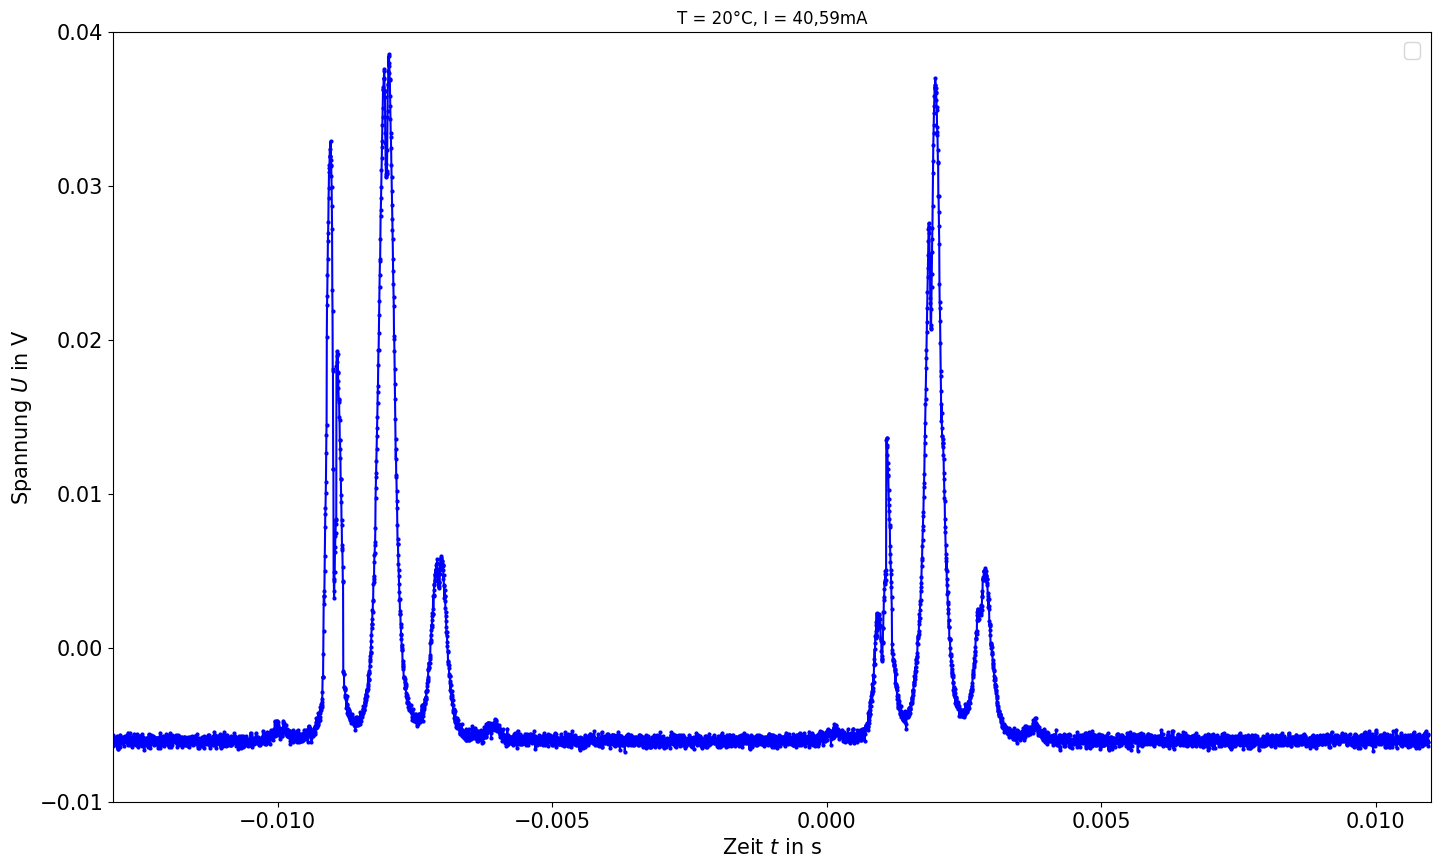

In [1469]:
x = data_array_T20[0, :, 0]
y = data_array_T20[0, :, 1]
plt.subplots(1,1,figsize=(17, 10));


plt.plot(x, y, marker='o', markersize=2, linestyle='-', color='blue')


plt.title(f"T = 20°C, I = 40,59mA")
plt.xlabel(r'Zeit $t$ in s', fontsize=15)
plt.ylabel(r'Spannung $U$ in V', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc = 'upper right', fontsize=15)
plt.axis([-0.013, 0.011, -0.01, 0.04]) #Achsenanpassung

# Display the plot
plt.show()

[array([ 999, 1265, 1503, 3532, 3753, 3980])]
Fitparameter
[ 2.83801468e-02 -5.57736354e+02  6.47338318e+00 -4.11749666e-03]
zugehörige Uncertainty
[1.10616932e-03 2.90896454e-01 2.92045059e-01 8.02349288e-05]
Fitparameter
[ 4.20873259e-02 -4.96130719e+02  8.26693749e+00 -4.39482814e-03]
zugehörige Uncertainty
[8.23859501e-04 1.86537174e-01 1.87483606e-01 6.77329048e-05]
Fitparameter
[ 9.92186719e-03 -4.36834589e+02  6.93919000e+00 -3.92351087e-03]
zugehörige Uncertainty
[1.14178828e-03 9.19875592e-01 9.23773143e-01 8.57890348e-05]
Fitparameter
[ 1.28932488e-02  6.81408560e+01  4.77316342e+00 -3.91116886e-03]
zugehörige Uncertainty
[1.37392946e-03 5.86169825e-01 5.87865843e-01 8.53163013e-05]


Fitparameter
[ 3.70963555e-02  1.20885907e+02  8.54546765e+00 -4.34259752e-03]
zugehörige Uncertainty
[8.60217693e-04 2.28406693e-01 2.29605737e-01 7.19364955e-05]
Fitparameter
[ 8.55989525e-03  1.76868504e+02  6.98757924e+00 -3.90824954e-03]
zugehörige Uncertainty
[1.13955412e-03 1.07421181e+00 1.07880354e+00 8.59986561e-05]


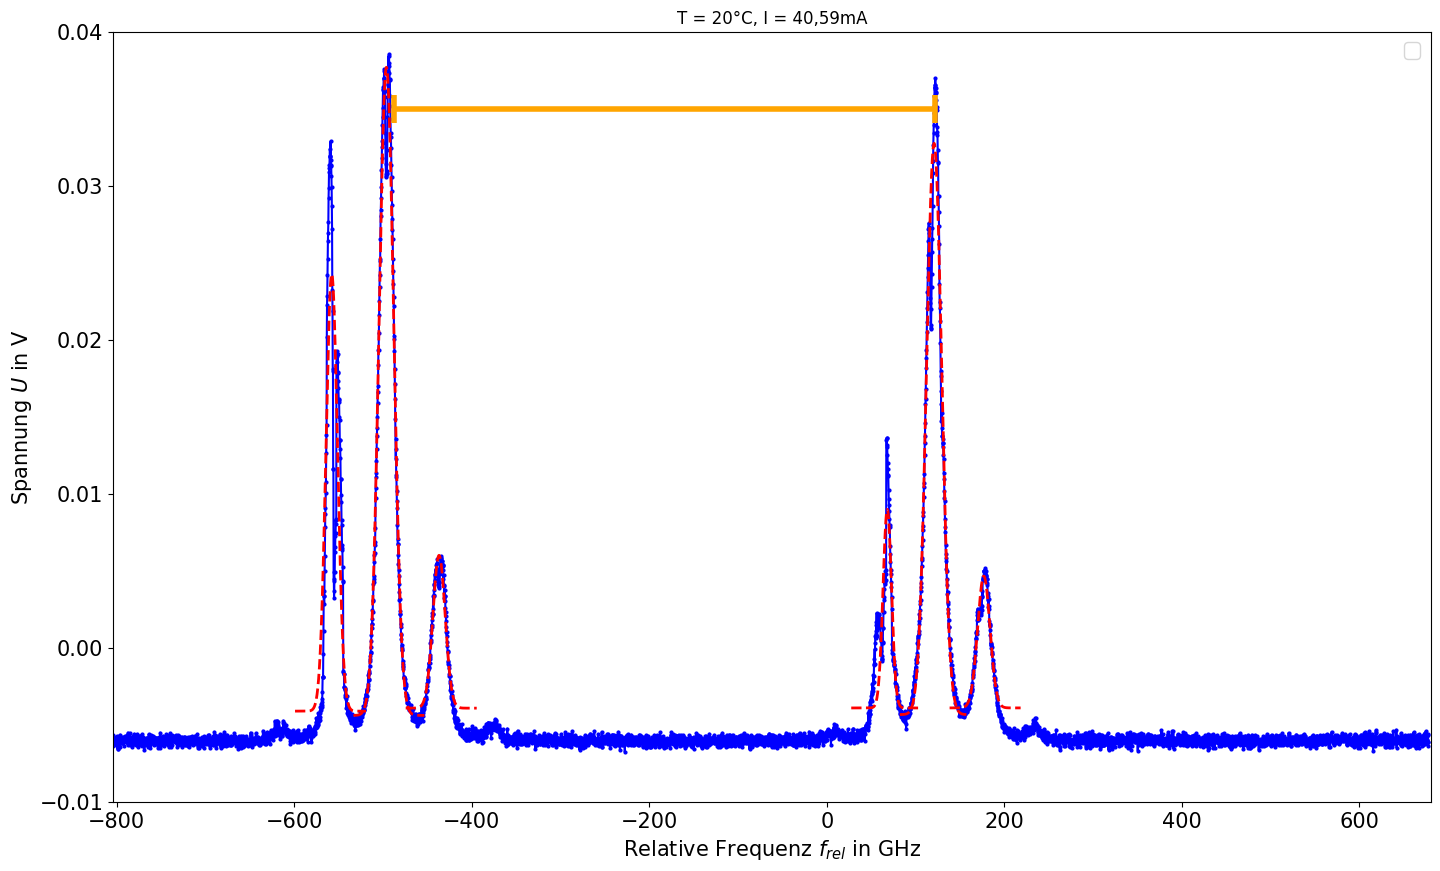

In [1470]:
peaks_results_demo = []
x = data_array_T20[0, :, 0] * kalibration.nominal_value
y = data_array_T20[0, :, 1]
plt.subplots(1,1,figsize=(17, 10));
peaks, _ = find_peaks(y, height=0, distance=100)
peaks_results_demo.append(peaks)
print(peaks_results_demo)

plt.plot(x, y, marker='o', markersize=2, linestyle='-', color='blue')
for j in range(len(peaks)):
  pars, stdevs, xfit, yfit = daten_fitten(gaussian, x, y, 100000, [y[peaks[j]], x[peaks[j]], 1, -0.01], x[peaks[j]]-40 ,x[peaks[j]]+40)
  plt.plot(xfit, yfit, '--', color='red', zorder= 4, linewidth=2)
  breite.append((pars[2]))

plt.errorbar(-183, 0.035, xerr=610/2, fmt='-', capsize=10, elinewidth=4, capthick=4, color='orange', zorder= 7)

plt.title(f"T = 20°C, I = 40,59mA")
plt.xlabel(r'Relative Frequenz $f_{rel}$ in GHz', fontsize=15)
plt.ylabel(r'Spannung $U$ in V', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc = 'upper right', fontsize=15)
plt.axis([-0.013* kalibration.nominal_value, 0.011* kalibration.nominal_value, -0.01, 0.04]) #Achsenanpassung

# Display the plot
plt.show()

Fitparameter
[ -20.98392526 1045.72751422]
zugehörige Uncertainty
[ 1.35131642 41.11455718]
Fitparameter
[ -5.16344662 659.12279889]
zugehörige Uncertainty
[0.10586869 2.59037734]
Fitparameter
[ -6.20167036 573.85057921]
zugehörige Uncertainty
[0.29615737 9.48367151]
Fitparameter
[ -6.5905923  525.15271622]
zugehörige Uncertainty
[0.23052385 8.52238121]
Fitparameter
[ -7.06791828 423.61678631]
zugehörige Uncertainty
[inf inf]


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


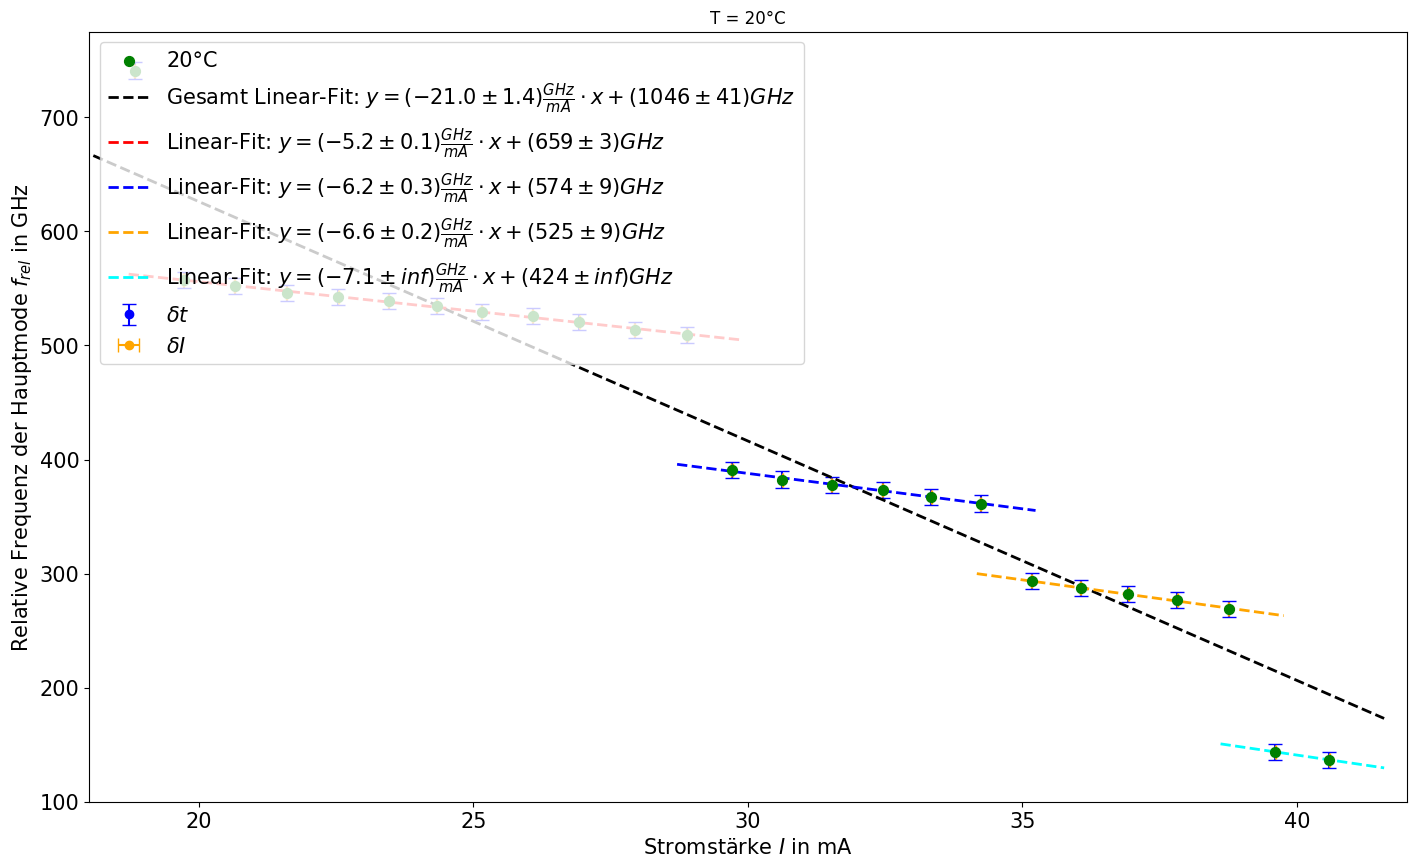

In [1471]:
top_peak_xvalue = []
for i in range(data_array_T20.shape[0]):
  x = data_array_T20[i, :, 0] * kalibration.nominal_value
  y = data_array_T20[i, :, 1]

  index_max_y = np.argmax(y)
  x_max_y = x[index_max_y]

  top_peak_xvalue.append((x_max_y))

plt.subplots(1,1,figsize=(17, 10));

x = dataA2_T20

y = np.array(top_peak_xvalue)
mask = (y < -500)

# Führe die Operation nur auf den maskierten Werten durch
y[mask] += 630
y += 630
x = np.concatenate(x)

plt.scatter(x, y, color='green', s=50, label='20°C', zorder= 5)

y_error = np.full(len(y), np.mean(breite))
x_error = np.full(len(x), 0.01)

plt.errorbar(x, y, yerr=y_error, fmt='o', capsize=5, color='blue', label='$\delta t$')
plt.errorbar(x, y, xerr=x_error, fmt='o', capsize=5, color='orange', label='$\delta I$')


pars, stdevs, xfit, yfit = daten_fitten(line, x, y, 1000, [1,1], min(x)-1, max(x)+1)
plt.plot(xfit, yfit, '--',label = r'Gesamt Linear-Fit: $ y = (%.1f \pm %.1f) \frac{GHz}{mA} \cdot x + (%.0f \pm %.0f) GHz$'%(pars[0], stdevs[0], pars[1], stdevs[1]), color='black', zorder= 4, linewidth=2)

steigungGes1 = ufloat(pars[0], stdevs[0])

y1 = []
x1 = []
for j in range(len(y)):
  if y[j] > 500 and y[j] < 600:
    y1.append(y[j])
    x1.append(x[j])

pars, stdevs, xfit, yfit = daten_fitten(line, x1, y1, 1000, [1,1], min(x1)-1, max(x1)+1)
plt.plot(xfit, yfit, '--',label = r'Linear-Fit: $ y = (%.1f \pm %.1f) \frac{GHz}{mA} \cdot x + (%.0f \pm %.0f) GHz$'%(pars[0], stdevs[0], pars[1], stdevs[1]), color='red', zorder= 4, linewidth=2)

steigung = ufloat(pars[0], stdevs[0])

y2 = []
x2 = []
for j in range(len(y)):
  if y[j] > 350 and y[j] < 450:
    y2.append(y[j])
    x2.append(x[j])

pars, stdevs, xfit, yfit = daten_fitten(line, x2, y2, 1000, [1,1], min(x2)-1, max(x2)+1)
plt.plot(xfit, yfit, '--',label = r'Linear-Fit: $ y = (%.1f \pm %.1f) \frac{GHz}{mA} \cdot x + (%.0f \pm %.0f) GHz$'%(pars[0], stdevs[0], pars[1], stdevs[1]), color='blue', zorder= 4, linewidth=2)

y3 = []
x3 = []
for j in range(len(y)):
  if y[j] > 250 and y[j] < 350:
    y3.append(y[j])
    x3.append(x[j])

pars, stdevs, xfit, yfit = daten_fitten(line, x3, y3, 1000, [1,1], min(x3)-1, max(x3)+1)
plt.plot(xfit, yfit, '--',label = r'Linear-Fit: $ y = (%.1f \pm %.1f) \frac{GHz}{mA} \cdot x + (%.0f \pm %.0f) GHz$'%(pars[0], stdevs[0], pars[1], stdevs[1]), color='orange', zorder= 4, linewidth=2)

y4 = []
x4 = []
for j in range(len(y)):
  if y[j] < 200:
    y4.append(y[j])
    x4.append(x[j])

pars, stdevs, xfit, yfit = daten_fitten(line, x4, y4, 1000, [1,1], min(x4)-1, max(x4)+1)
plt.plot(xfit, yfit, '--',label = r'Linear-Fit: $ y = (%.1f \pm %.1f) \frac{GHz}{mA} \cdot x + (%.0f \pm %.0f) GHz$'%(pars[0], stdevs[0], pars[1], stdevs[1]), color='cyan', zorder= 4, linewidth=2)

plt.title(f"T = 20°C")
plt.xlabel(r'Stromstärke $I$ in mA', fontsize=15)
plt.ylabel(r'Relative Frequenz der Hauptmode $f_{rel}$ in GHz', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


plt.axis([18, 42, 100, 775]) #Achsenanpassung
plt.legend(loc = 'upper left', fontsize=15)
# Display the plot
plt.show()


In [1472]:
peaks_results_T25 = []
for i in range(data_array_T25.shape[0]):
    x = data_array_T25[i, :, 0]
    y = data_array_T25[i, :, 1]

    peaks, _ = find_peaks(y, height=0.01, distance=100)
    peaks_results_T25.append((i, peaks))

In [1473]:
distances = calculate_peak_distances(peaks_results_T25, data_array_T25)
mean_distance = np.mean(distances)
std_dev_distance = np.std(distances)
number = len(distances)
print("Mittlerer Abstand zwischen den Peaks:", mean_distance)
print("Standardabweichung der Abstände zwischen den Peaks:", std_dev_distance)
print(number, "Peak-Paare wurden analysiert")

distance = ufloat(mean_distance, std_dev_distance)
print(distance)

kalibration = 630/distance
print(kalibration)

mode_distances = calculate_mode_distances(peaks_results_T25, data_array_T25)
mode_distances25 = mode_distances* kalibration

mean_distance = np.mean(mode_distances)
std_dev_distance = np.std(mode_distances)
number = len(mode_distances)
print("Mittlerer Abstand zwischen den Moden:", mean_distance)
print("Standardabweichung der Abstände zwischen den Moden:", std_dev_distance)
print("Max Moden Abstand:", max(mode_distances))
print("Min Moden Abstand:", min(mode_distances))
print("Standardabweichung der Abstände zwischen den Moden:", std_dev_distance)
print(number, "Moden-Paare wurden analysiert")

mode_distances = ufloat(mean_distance, std_dev_distance)
print(mode_distances)
mode_distances = mode_distances* kalibration
print(mode_distances)

Mittlerer Abstand zwischen den Peaks: 0.010386500016666666
Standardabweichung der Abstände zwischen den Peaks: 0.0006477199287114811
24 Peak-Paare wurden analysiert
0.0104+/-0.0006
(6.1+/-0.4)e+04
Mittlerer Abstand zwischen den Moden: 0.0009366470647058822
Standardabweichung der Abstände zwischen den Moden: 5.522407649672207e-05
Max Moden Abstand: 0.0010240000000000006
Min Moden Abstand: 0.0007480000000000004
Standardabweichung der Abstände zwischen den Moden: 5.522407649672207e-05
68 Moden-Paare wurden analysiert
0.00094+/-0.00006
57+/-5


In [1474]:
peaks_results_T25 = []
breite = []
for i in range(data_array_T25.shape[0]):
    x = data_array_T25[i, :, 0] * kalibration.nominal_value
    y = data_array_T25[i, :, 1]

    peaks, _ = find_peaks(y, height=0.01, distance=100)
    peaks_results_T25.append((i, peaks))

    plt.subplots(1,1,figsize=(17, 10));

    plt.plot(x, y, marker='o', markersize=2, linestyle='-', color='blue')

    for j in range(len(peaks)):
      plt.scatter(x[peaks[j]], y[peaks[j]], color='black', marker='x', s=100, label = r'Peak: $((%.3f|%.3f )$'%(x[peaks[j]], y[peaks[j]]), zorder= 7)
      pars, stdevs, xfit, yfit = daten_fitten(gaussian, x, y, 100000, [y[peaks[j]], x[peaks[j]], 1, -0.01], x[peaks[j]]-40 ,x[peaks[j]]+40)
      plt.plot(xfit, yfit, '--', color='red', zorder= 4, linewidth=2)
      breite.append((pars[2]))


    # Füge Titel und Beschriftungen hinzu
    plt.title(f"T = 25°C Plot {i}")
    plt.xlabel(r'Zeit $t$ in GHz', fontsize=15)
    plt.ylabel(r'Spannung $U$ in V', fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(loc = 'upper left', fontsize=15)
    plt.axis([-0.013* kalibration.nominal_value, 0.011* kalibration.nominal_value, -0.01, 0.04]) #Achsenanpassung


# Display the plot
plt.show()

Output hidden; open in https://colab.research.google.com to view.

[-405.66504532218903, -397.41587574027847, -388.68146088884373, -379.704423402647, -373.6388575335951, -311.04221776497985, -790.2219214200775, -784.8842234553119, -718.6482441652654, -772.5104690824461, -764.7465447700596, -759.6514694400561, -753.5859035710042, -746.06460189338, -738.7859228505176, -731.5072438076554, -726.6547911124139, -721.5597157824104, -596.851681514704, -592.4844740889866, -587.6320213937452, -582.5369460637415, -577.441870733738, -571.3763048646861, -449.0944969446004]
Fitparameter
[ -23.8374383  1197.63752888]
zugehörige Uncertainty
[ 1.47748759 44.45657679]
Fitparameter
[ -5.42160586 793.28070177]
zugehörige Uncertainty
[0.10952302 2.39019404]
Fitparameter
[ -7.03274353 714.97106669]
zugehörige Uncertainty
[0.09243536 2.75732247]
Fitparameter
[ -8.55159273 570.95062466]
zugehörige Uncertainty
[ 0.29051593 11.21673034]


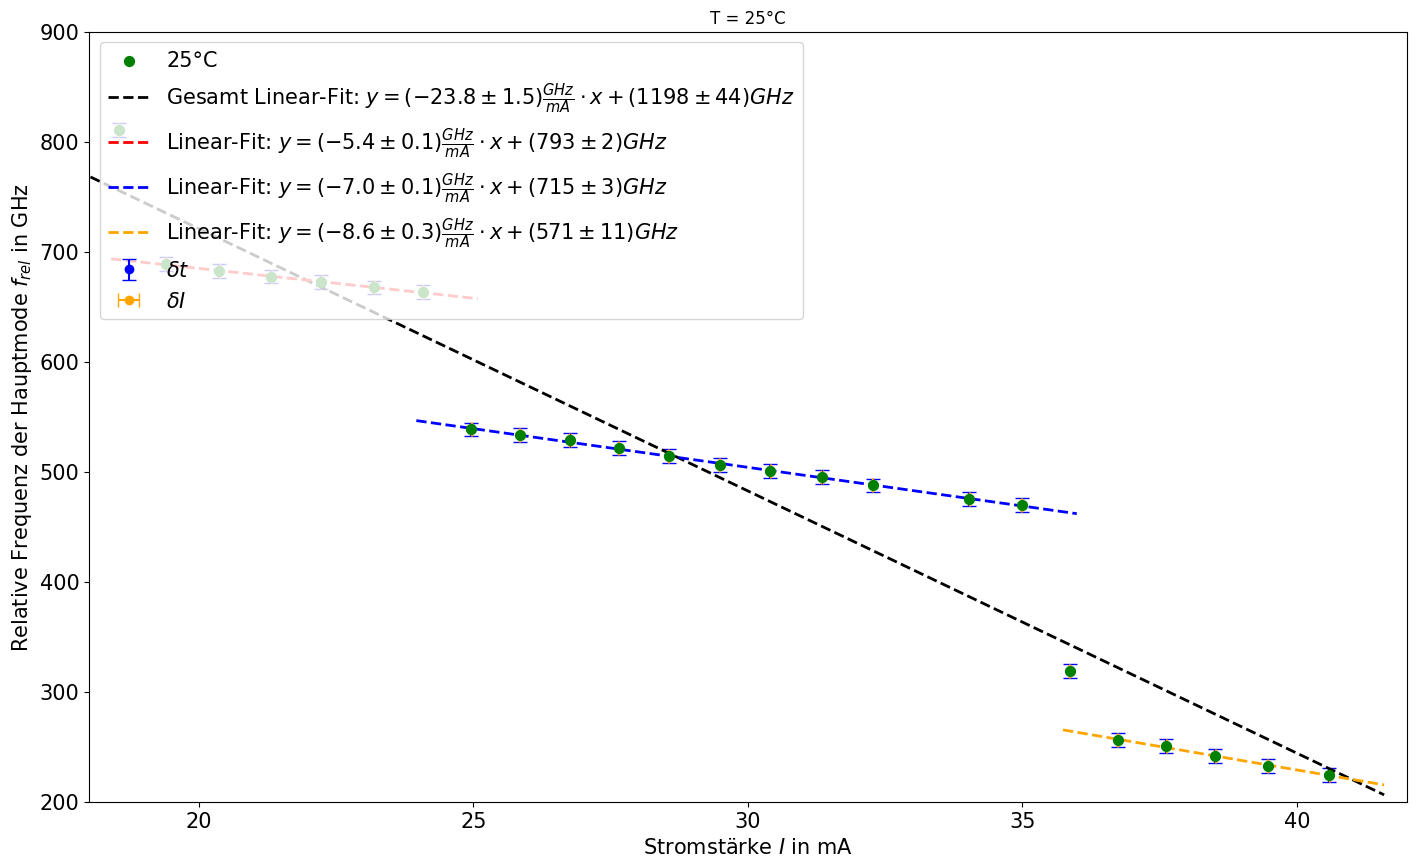

In [1475]:
top_peak_xvalue = []
for i in range(data_array_T25.shape[0]):
  x = data_array_T25[i, :, 0] * kalibration.nominal_value
  y = data_array_T25[i, :, 1]

  index_max_y = np.argmax(y)
  x_max_y = x[index_max_y]

  top_peak_xvalue.append((x_max_y))

plt.subplots(1,1,figsize=(17, 10));

print(top_peak_xvalue)

x = dataA2_T25

y = np.array(top_peak_xvalue)

# Führe die Operation nur auf den maskierten Werten durch
y += 630
mask = (y < 200)
y[mask] += 630
x = np.concatenate(x)
y = np.delete(y, 8)
x = np.delete(x, 8)



plt.scatter(x, y, color='green', s=50, label='25°C', zorder= 5)

y_error = np.full(len(y), np.mean(breite))
x_error = np.full(len(x), 0.01)

plt.errorbar(x, y, yerr=y_error, fmt='o', capsize=5, color='blue', label='$\delta t$')
plt.errorbar(x, y, xerr=x_error, fmt='o', capsize=5, color='orange', label='$\delta I$')

pars, stdevs, xfit, yfit = daten_fitten(line, x, y, 1000, [1,1], min(x)-1, max(x)+1)
plt.plot(xfit, yfit, '--',label = r'Gesamt Linear-Fit: $ y = (%.1f \pm %.1f) \frac{GHz}{mA} \cdot x + (%.0f \pm %.0f) GHz$'%(pars[0], stdevs[0], pars[1], stdevs[1]), color='black', zorder= 4, linewidth=2)

steigungGes2 = ufloat(pars[0], stdevs[0])

y1 = []
x1 = []
for j in range(len(y)):
  if y[j] > 600 and y[j] < 700:
    y1.append(y[j])
    x1.append(x[j])

pars, stdevs, xfit, yfit = daten_fitten(line, x1, y1, 1000, [1,1], min(x1)-1, max(x1)+1)
plt.plot(xfit, yfit, '--',label = r'Linear-Fit: $ y = (%.1f \pm %.1f) \frac{GHz}{mA} \cdot x + (%.0f \pm %.0f) GHz$'%(pars[0], stdevs[0], pars[1], stdevs[1]), color='red', zorder= 4, linewidth=2)

y2 = []
x2 = []
for j in range(len(y)):
  if y[j] > 400 and y[j] < 600:
    y2.append(y[j])
    x2.append(x[j])

pars, stdevs, xfit, yfit = daten_fitten(line, x2, y2, 1000, [1,1], min(x2)-1, max(x2)+1)
plt.plot(xfit, yfit, '--',label = r'Linear-Fit: $ y = (%.1f \pm %.1f) \frac{GHz}{mA} \cdot x + (%.0f \pm %.0f) GHz$'%(pars[0], stdevs[0], pars[1], stdevs[1]), color='blue', zorder= 4, linewidth=2)

y3 = []
x3 = []
for j in range(len(y)):
  if y[j] < 300:
    y3.append(y[j])
    x3.append(x[j])

pars, stdevs, xfit, yfit = daten_fitten(line, x3, y3, 1000, [1,1], min(x3)-1, max(x3)+1)
plt.plot(xfit, yfit, '--',label = r'Linear-Fit: $ y = (%.1f \pm %.1f) \frac{GHz}{mA} \cdot x + (%.0f \pm %.0f) GHz$'%(pars[0], stdevs[0], pars[1], stdevs[1]), color='orange', zorder= 4, linewidth=2)

plt.title(f"T = 25°C")
plt.xlabel(r'Stromstärke $I$ in mA', fontsize=15)
plt.ylabel(r'Relative Frequenz der Hauptmode $f_{rel}$ in GHz', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.axis([18, 42, 200, 900]) #Achsenanpassung
plt.legend(loc = 'upper left', fontsize=15)
# Display the plot
plt.show()


In [1476]:
peaks_results_T30 = []
for i in range(data_array_T30.shape[0]):
    x = data_array_T30[i, :, 0]
    y = data_array_T30[i, :, 1]

    peaks, _ = find_peaks(y, height=0.01, distance=100)
    peaks_results_T30.append((i, peaks))

In [1477]:
distances = calculate_peak_distances(peaks_results_T30, data_array_T30)
mean_distance = np.mean(distances)
std_dev_distance = np.std(distances)
number = len(distances)
print("Mittlerer Abstand zwischen den Peaks:", mean_distance)
print("Standardabweichung der Abstände zwischen den Peaks:", std_dev_distance)
print(number, "Peak-Paare wurden analysiert")

distance = ufloat(mean_distance, std_dev_distance)
print(distance)

kalibration = 630/distance
print(kalibration)

mode_distances = calculate_mode_distances(peaks_results_T30, data_array_T30)
mode_distances30 = mode_distances* kalibration

mean_distance = np.mean(mode_distances)
std_dev_distance = np.std(mode_distances)
number = len(mode_distances)
print("Mittlerer Abstand zwischen den Moden:", mean_distance)
print("Standardabweichung der Abstände zwischen den Moden:", std_dev_distance)
print("Max Moden Abstand:", max(mode_distances))
print("Min Moden Abstand:", min(mode_distances))
print("Standardabweichung der Abstände zwischen den Moden:", std_dev_distance)
print(number, "Moden-Paare wurden analysiert")

mode_distances = ufloat(mean_distance, std_dev_distance)
print(mode_distances)
mode_distances = mode_distances* kalibration
print(mode_distances)

Mittlerer Abstand zwischen den Peaks: 0.009911999999999999
Standardabweichung der Abstände zwischen den Peaks: 0.00015019986684414874
9 Peak-Paare wurden analysiert
0.00991+/-0.00015
(6.36+/-0.10)e+04
Mittlerer Abstand zwischen den Moden: 0.0009274285714285715
Standardabweichung der Abstände zwischen den Moden: 4.6815312338889166e-05
Max Moden Abstand: 0.001011999999999999
Min Moden Abstand: 0.00082
Standardabweichung der Abstände zwischen den Moden: 4.6815312338889166e-05
28 Moden-Paare wurden analysiert
0.00093+/-0.00005
58.9+/-3.1


In [1478]:
peaks_results_T30 = []
breite = []
for i in range(data_array_T30.shape[0]):
    x = data_array_T30[i, :, 0] * kalibration.nominal_value
    y = data_array_T30[i, :, 1]

    peaks, _ = find_peaks(y, height=0.01, distance=100)
    peaks_results_T30.append((i, peaks))

    plt.subplots(1,1,figsize=(17, 10));

    plt.plot(x, y, marker='o', markersize=2, linestyle='-', color='blue')

    for j in range(len(peaks)):
      plt.scatter(x[peaks[j]], y[peaks[j]], color='black', marker='x', s=100, label = r'Peak: $((%.3f|%.3f )$'%(x[peaks[j]], y[peaks[j]]), zorder= 7)
      pars, stdevs, xfit, yfit = daten_fitten(gaussian, x, y, 100000, [y[peaks[j]], x[peaks[j]], 1, -0.01], x[peaks[j]]-40 ,x[peaks[j]]+40)
      plt.plot(xfit, yfit, '--', color='red', zorder= 4, linewidth=2)
      breite.append((pars[2]))


    # Füge Titel und Beschriftungen hinzu
    plt.title(f"T = 30°C Plot {i}")
    plt.xlabel(r'Zeit $t$ in GHz', fontsize=15)
    plt.ylabel(r'Spannung $U$ in V', fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(loc = 'upper left', fontsize=15)
    plt.axis([-0.013* kalibration.nominal_value, 0.011* kalibration.nominal_value, -0.01, 0.04]) #Achsenanpassung


# Display the plot
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Fitparameter
[ -21.8499555  1179.90619715]
zugehörige Uncertainty
[ 0.66376973 20.19637184]
Fitparameter
[-11.42847464 981.16810982]
zugehörige Uncertainty
[ 0.63884864 13.41017104]
Fitparameter
[ -7.28723774 762.4710454 ]
zugehörige Uncertainty
[0.07315383 1.98070698]
Fitparameter
[ -9.96000529 778.35068335]
zugehörige Uncertainty
[ 0.47780916 15.49298702]
Fitparameter
[-16.81786136 998.62778875]
zugehörige Uncertainty
[ 1.73462846 66.02132436]


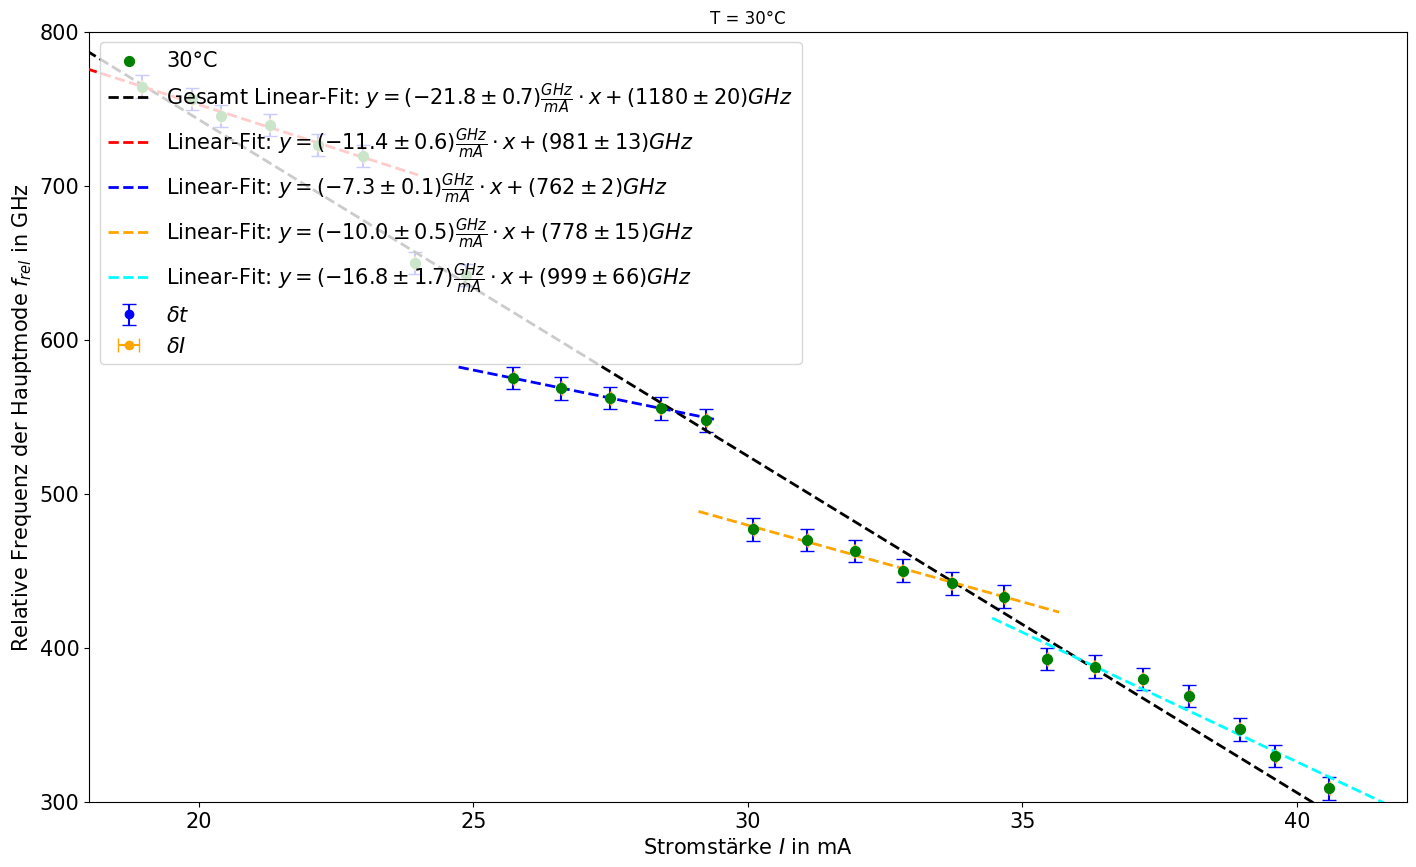

In [1479]:
top_peak_xvalue = []
for i in range(data_array_T30.shape[0]):
  x = data_array_T30[i, :, 0] * kalibration.nominal_value
  y = data_array_T30[i, :, 1]

  index_max_y = np.argmax(y)
  x_max_y = x[index_max_y]

  top_peak_xvalue.append((x_max_y))

plt.subplots(1,1,figsize=(17, 10));

x = dataA2_T30

y = np.array(top_peak_xvalue)
mask = (y < -400)

# Führe die Operation nur auf den maskierten Werten durch
y[mask] += 630
y += 630

x = np.concatenate(x)

plt.scatter(x, y, color='green', s=50, label='30°C', zorder= 5)

y_error = np.full(len(y), np.mean(breite))
x_error = np.full(len(x), 0.01)

plt.errorbar(x, y, yerr=y_error, fmt='o', capsize=5, color='blue', label='$\delta t$')
plt.errorbar(x, y, xerr=x_error, fmt='o', capsize=5, color='orange', label='$\delta I$')

pars, stdevs, xfit, yfit = daten_fitten(line, x, y, 1000, [1,1], min(x)-1, max(x)+1)
plt.plot(xfit, yfit, '--',label = r'Gesamt Linear-Fit: $ y = (%.1f \pm %.1f) \frac{GHz}{mA} \cdot x + (%.0f \pm %.0f) GHz$'%(pars[0], stdevs[0], pars[1], stdevs[1]), color='black', zorder= 4, linewidth=2)

steigungGes3 = ufloat(pars[0], stdevs[0])

y1 = []
x1 = []
for j in range(len(y)):
  if y[j] > 700:
    y1.append(y[j])
    x1.append(x[j])

pars, stdevs, xfit, yfit = daten_fitten(line, x1, y1, 1000, [1,1], min(x1)-1, max(x1)+1)
plt.plot(xfit, yfit, '--',label = r'Linear-Fit: $ y = (%.1f \pm %.1f) \frac{GHz}{mA} \cdot x + (%.0f \pm %.0f) GHz$'%(pars[0], stdevs[0], pars[1], stdevs[1]), color='red', zorder= 4, linewidth=2)

y2 = []
x2 = []
for j in range(len(y)):
  if y[j] < 600 and y[j] > 550:
    y2.append(y[j])
    x2.append(x[j])

pars, stdevs, xfit, yfit = daten_fitten(line, x2, y2, 1000, [1,1], min(x2)-1, max(x2)+1)
plt.plot(xfit, yfit, '--',label = r'Linear-Fit: $ y = (%.1f \pm %.1f) \frac{GHz}{mA} \cdot x + (%.0f \pm %.0f) GHz$'%(pars[0], stdevs[0], pars[1], stdevs[1]), color='blue', zorder= 4, linewidth=2)

y3 = []
x3 = []
for j in range(len(y)):
  if y[j] < 500 and y[j] > 420:
    y3.append(y[j])
    x3.append(x[j])

pars, stdevs, xfit, yfit = daten_fitten(line, x3, y3, 1000, [1,1], min(x3)-1, max(x3)+1)
plt.plot(xfit, yfit, '--',label = r'Linear-Fit: $ y = (%.1f \pm %.1f) \frac{GHz}{mA} \cdot x + (%.0f \pm %.0f) GHz$'%(pars[0], stdevs[0], pars[1], stdevs[1]), color='orange', zorder= 4, linewidth=2)

y4 = []
x4 = []
for j in range(len(y)):
  if y[j] < 420:
    y4.append(y[j])
    x4.append(x[j])

pars, stdevs, xfit, yfit = daten_fitten(line, x4, y4, 1000, [1,1], min(x4)-1, max(x4)+1)
plt.plot(xfit, yfit, '--',label = r'Linear-Fit: $ y = (%.1f \pm %.1f) \frac{GHz}{mA} \cdot x + (%.0f \pm %.0f) GHz$'%(pars[0], stdevs[0], pars[1], stdevs[1]), color='cyan', zorder= 4, linewidth=2)

plt.title(f"T = 30°C")
plt.xlabel(r'Stromstärke $I$ in mA', fontsize=15)
plt.ylabel(r'Relative Frequenz der Hauptmode $f_{rel}$ in GHz', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.axis([18, 42, 300, 800]) #Achsenanpassung
# Display the plot
plt.legend(loc = 'upper left', fontsize=15)
plt.show()


In [1480]:
peaks_results_A36 = []
for i in range(data_array_A36.shape[0]):
    x = data_array_A36[i, :, 0]
    y = data_array_A36[i, :, 1]

    peaks, _ = find_peaks(y, height=0.01, distance=100)
    peaks_results_A36.append((i, peaks))

In [1481]:
distances = calculate_peak_distances(peaks_results_A36, data_array_A36)
mean_distance = np.mean(distances)
std_dev_distance = np.std(distances)
number = len(distances)
print("Mittlerer Abstand zwischen den Peaks:", mean_distance)
print("Standardabweichung der Abstände zwischen den Peaks:", std_dev_distance)
print(number, "Peak-Paare wurden analysiert")

distance = ufloat(mean_distance, std_dev_distance)
print(distance)

kalibration = 630/distance
print(kalibration)

mode_distances = calculate_mode_distances(peaks_results_A36, data_array_A36)
mode_distances = np.delete(mode_distances, 1)
mode_distances36 = mode_distances* kalibration

mean_distance = np.mean(mode_distances)
std_dev_distance = np.std(mode_distances)
number = len(mode_distances)
print("Mittlerer Abstand zwischen den Moden:", mean_distance)
print("Standardabweichung der Abstände zwischen den Moden:", std_dev_distance)
print("Max Moden Abstand:", max(mode_distances))
print("Min Moden Abstand:", min(mode_distances))
print("Standardabweichung der Abstände zwischen den Moden:", std_dev_distance)
print(number, "Moden-Paare wurden analysiert")

mode_distances = ufloat(mean_distance, std_dev_distance)
print(mode_distances)
mode_distances = mode_distances* kalibration
print(mode_distances)

Mittlerer Abstand zwischen den Peaks: 0.010067
Standardabweichung der Abstände zwischen den Peaks: 0.00032199534158120993
16 Peak-Paare wurden analysiert
0.01007+/-0.00032
(6.26+/-0.20)e+04
Mittlerer Abstand zwischen den Moden: 0.0009215555555555555
Standardabweichung der Abstände zwischen den Moden: 4.976636773991753e-05
Max Moden Abstand: 0.0010559999999999996
Min Moden Abstand: 0.0008399999999999998
Standardabweichung der Abstände zwischen den Moden: 4.976636773991753e-05
18 Moden-Paare wurden analysiert
0.00092+/-0.00005
58+/-4


In [1482]:
peaks_results_A36 = []
breite = []
for i in range(data_array_A36.shape[0]):
    x = data_array_A36[i, :, 0] * kalibration.nominal_value
    y = data_array_A36[i, :, 1]
    if i>=18:
      x -= 250

    peaks, _ = find_peaks(y, height=0.01, distance=100)
    peaks_results_A36.append((i, peaks))

    plt.subplots(1,1,figsize=(17, 10));

    plt.plot(x, y, marker='o', markersize=2, linestyle='-', color='blue')

    for j in range(len(peaks)):
      plt.scatter(x[peaks[j]], y[peaks[j]], color='black', marker='x', s=100, label = r'Peak: $((%.3f|%.3f )$'%(x[peaks[j]], y[peaks[j]]), zorder= 7)
      pars, stdevs, xfit, yfit = daten_fitten(gaussian, x, y, 100000, [y[peaks[j]], x[peaks[j]], 1, -0.01], x[peaks[j]]-40 ,x[peaks[j]]+40)
      plt.plot(xfit, yfit, '--', color='red', zorder= 4, linewidth=2)
      breite.append((pars[2]))


    # Füge Titel und Beschriftungen hinzu
    plt.title(f"A = 36mA Plot {i}")
    plt.xlabel(r'Zeit $t$ in GHz', fontsize=15)
    plt.ylabel(r'Spannung $U$ in V', fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(loc = 'upper left', fontsize=15)
    plt.axis([-0.013* kalibration.nominal_value, 0.011* kalibration.nominal_value, -0.01, 0.04]) #Achsenanpassung


# Display the plot
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Fitparameter
[-162.08468694 4413.16316543]
zugehörige Uncertainty
[ 10.18681482 256.53115351]
Fitparameter
[-166.82765219 4647.8942552 ]
zugehörige Uncertainty
[ 23.4661797  493.06905269]
Fitparameter
[-158.16648339 4221.46307   ]
zugehörige Uncertainty
[ 19.93446273 468.67189636]
Fitparameter
[ -76.69891782 2063.04819182]
zugehörige Uncertainty
[ 13.21135381 343.62220812]
Fitparameter
[-20.12238005 410.56223304]
zugehörige Uncertainty
[ 10.22023777 293.96141167]


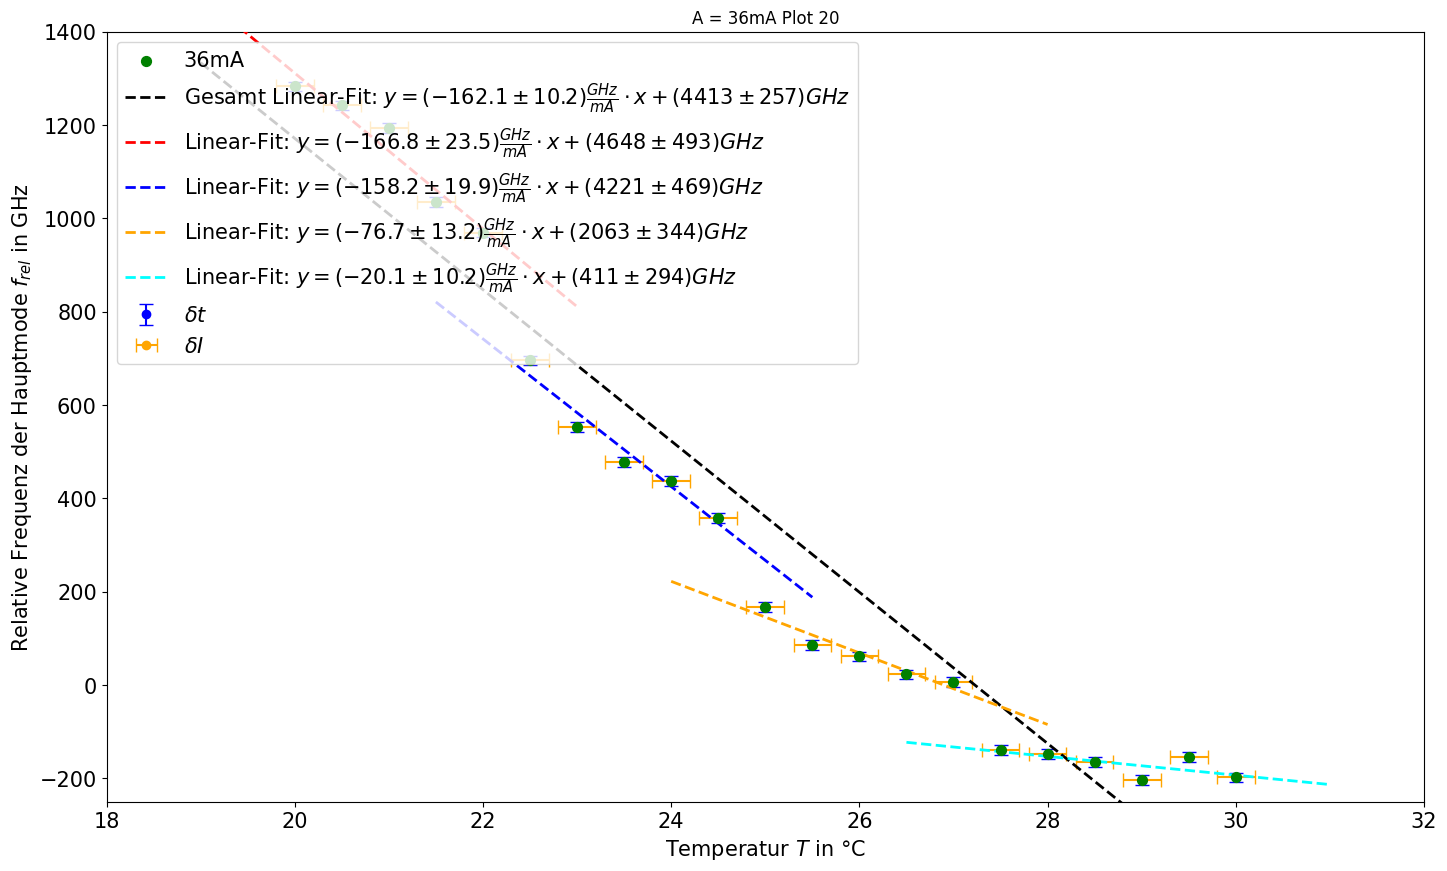

In [1483]:
top_peak_xvalue = []
for i in range(data_array_A36.shape[0]):
  x = data_array_A36[i, :, 0] * kalibration.nominal_value
  y = data_array_A36[i, :, 1]

  index_max_y = np.argmax(y)
  x_max_y = x[index_max_y]

  top_peak_xvalue.append((x_max_y))

plt.subplots(1,1,figsize=(17, 10));

x = dataA2_A36

y = np.array(top_peak_xvalue)

# Führe die Operation nur auf den maskierten Werten durch

y[0] +=630*2
y[1] +=630*2
y[2] +=630*2
y[3] +=630
y[4] +=630
y[5] +=630 #2
y[6] +=630 #2
y[7] +=630 #2
y+= 630
y[len(y)-1] -= 630
y[len(y)-2] -= 630
y[len(y)-3] -= 630


x = np.concatenate(x)

plt.scatter(x, y, color='green', s=50, label='36mA', zorder= 5)

y_error = np.full(len(y), np.mean(breite))
x_error = np.full(len(x), 0.2)

plt.errorbar(x, y, yerr=y_error, fmt='o', capsize=5, color='blue', label='$\delta t$')
plt.errorbar(x, y, xerr=x_error, fmt='o', capsize=5, color='orange', label='$\delta I$')

pars, stdevs, xfit, yfit = daten_fitten(line, x, y, 1000, [1,1], min(x)-1, max(x)+1)
plt.plot(xfit, yfit, '--',label = r'Gesamt Linear-Fit: $ y = (%.1f \pm %.1f) \frac{GHz}{mA} \cdot x + (%.0f \pm %.0f) GHz$'%(pars[0], stdevs[0], pars[1], stdevs[1]), color='black', zorder= 4, linewidth=2)

steigungGes4 = ufloat(pars[0], stdevs[0])

y1 = []
x1 = []
for j in range(len(y)):
  if y[j] > 800:
    y1.append(y[j])
    x1.append(x[j])

pars, stdevs, xfit, yfit = daten_fitten(line, x1, y1, 1000, [1,1], min(x1)-1, max(x1)+1)
plt.plot(xfit, yfit, '--',label = r'Linear-Fit: $ y = (%.1f \pm %.1f) \frac{GHz}{mA} \cdot x + (%.0f \pm %.0f) GHz$'%(pars[0], stdevs[0], pars[1], stdevs[1]), color='red', zorder= 4, linewidth=2)

y2 = []
x2 = []
for j in range(len(y)):
  if y[j] < 800 and y[j] > 300:
    y2.append(y[j])
    x2.append(x[j])

pars, stdevs, xfit, yfit = daten_fitten(line, x2, y2, 1000, [1,1], min(x2)-1, max(x2)+1)
plt.plot(xfit, yfit, '--',label = r'Linear-Fit: $ y = (%.1f \pm %.1f) \frac{GHz}{mA} \cdot x + (%.0f \pm %.0f) GHz$'%(pars[0], stdevs[0], pars[1], stdevs[1]), color='blue', zorder= 4, linewidth=2)

y3 = []
x3 = []
for j in range(len(y)):
  if y[j] < 300 and y[j] > 0:
    y3.append(y[j])
    x3.append(x[j])

pars, stdevs, xfit, yfit = daten_fitten(line, x3, y3, 1000, [1,1], min(x3)-1, max(x3)+1)
plt.plot(xfit, yfit, '--',label = r'Linear-Fit: $ y = (%.1f \pm %.1f) \frac{GHz}{mA} \cdot x + (%.0f \pm %.0f) GHz$'%(pars[0], stdevs[0], pars[1], stdevs[1]), color='orange', zorder= 4, linewidth=2)

y4 = []
x4 = []
for j in range(len(y)):
  if y[j] < 0:
    y4.append(y[j])
    x4.append(x[j])

pars, stdevs, xfit, yfit = daten_fitten(line, x4, y4, 1000, [1,1], min(x4)-1, max(x4)+1)
plt.plot(xfit, yfit, '--',label = r'Linear-Fit: $ y = (%.1f \pm %.1f) \frac{GHz}{mA} \cdot x + (%.0f \pm %.0f) GHz$'%(pars[0], stdevs[0], pars[1], stdevs[1]), color='cyan', zorder= 4, linewidth=2)

plt.title(f"A = 36mA Plot {i}")
plt.xlabel(r'Temperatur $T$ in °C', fontsize=15)
plt.ylabel(r'Relative Frequenz der Hauptmode $f_{rel}$ in GHz', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.axis([18, 32, -250, 1400]) #Achsenanpassung
# Display the plot
plt.legend(loc = 'upper left', fontsize=15)
plt.show()


In [1484]:
mode_distances = np.concatenate((mode_distances20, mode_distances25, mode_distances30, mode_distances36))

mode_distance = np.mean(mode_distances)
print("Mittlerer Abstand zwischen den Moden:", mode_distance)

frequenz = c/wellenlänge
print('Frequenz = ', frequenz*10**(-9), 'GHz')

anzahl = frequenz*10**(-9)/mean
print('Wie oft Mode in Frequenz = ', anzahl)

breite = np.array(breite)

mask = (breite >= 4) & (breite <= 15)

breite = breite[mask]

mean_breite = np.mean(breite)
std = np.std(breite)
breite_value = ufloat(mean_breite, std)
print(breite_value)

FWHM= breite_value*2*math.sqrt(2*math.log(2))
print(FWHM)

finesse = FWHM/mode_distance
print(finesse)

verschiebung1mode = steigung/anzahl
print(verschiebung1mode)

print(steigungGes1, steigungGes2, steigungGes3, steigungGes4)

Mittlerer Abstand zwischen den Moden: 57.6+/-1.7
Frequenz =  447761.1940298507 GHz
Wie oft Mode in Frequenz =  (7.78+/-0.23)e+03
9.7+/-2.3
23+/-5
0.40+/-0.09
-0.000664+/-0.000024
-21.0+/-1.4 -23.8+/-1.5 -21.8+/-0.7 -162+/-10
